<a href="https://colab.research.google.com/github/daniellekarlas/MLSENAC_Danielle/blob/main/Aula13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
titanic=sns.load_dataset("titanic")

feature_names=["pclass", "female", "age", "fare"]
titanic["female"]=titanic["sex"].map({"male":0, "female":1})
titanic.dropna(subset=feature_names, inplace=True) #891 para 714

In [4]:
X=titanic[feature_names].to_numpy()
Y=titanic["survived"].to_numpy()

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.25, random_state=123)

In [5]:
print("Tamanho de X_train:", X_train.shape)
print("Tamanho de X_test:", X_test.shape)
print("Tamanho de Y_train:", Y_train.shape)
print("Tamanho de Y_test:", Y_test.shape)

Tamanho de X_train: (535, 4)
Tamanho de X_test: (179, 4)
Tamanho de Y_train: (535,)
Tamanho de Y_test: (179,)


In [6]:
model=keras.models.Sequential()
model.add(keras.layers.Dense(4, activation="relu", input_shape=X_train[0].shape))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(), metrics=["accuracy"])

In [9]:
batch_size=32
epochs=100

history=model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/100
17/17 [==============================] - 1s 16ms/step - loss: 3.6511 - accuracy: 0.5738 - val_loss: 2.6762 - val_accuracy: 0.6034
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 3.5806 - accuracy: 0.5533 - val_loss: 2.2623 - val_accuracy: 0.6034
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 3.1718 - accuracy: 0.5645 - val_loss: 1.9041 - val_accuracy: 0.5978
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 2.7728 - accuracy: 0.5364 - val_loss: 1.6068 - val_accuracy: 0.6034
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 2.3100 - accuracy: 0.5551 - val_loss: 1.4044 - val_accuracy: 0.4804
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 2.0150 - accuracy: 0.4654 - val_loss: 1.2425 - val_accuracy: 0.4413
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 1.7918 - accuracy: 0.4673 - val_loss: 1.0926 - val_accuracy: 0.4246
Epoch 8/100


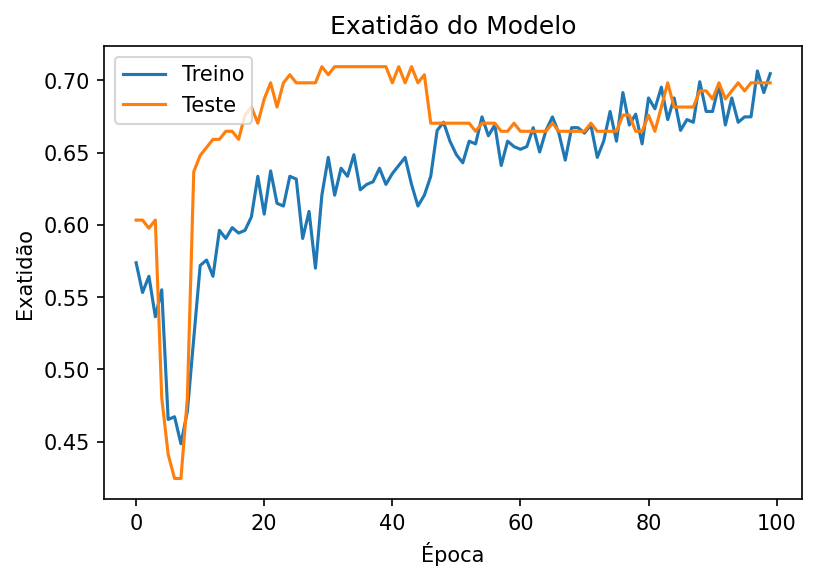

In [10]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams["figure.dpi"]=150

#plot acurácia de treino e validação
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Exatidão do Modelo")
plt.ylabel("Exatidão")
plt.xlabel("Época")
plt.legend(["Treino", "Teste"], loc="upper left")
plt.show()


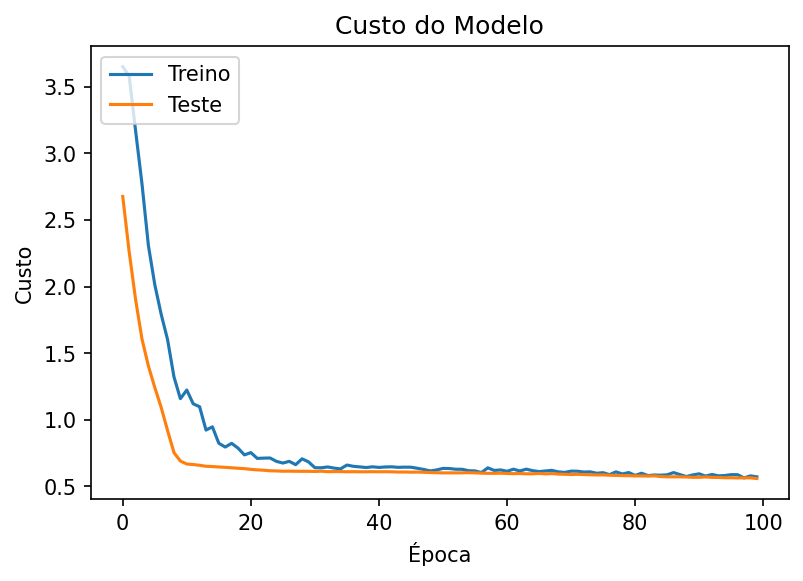

In [11]:
#plot custo de treino e validação

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Custo do Modelo")
plt.ylabel("Custo")
plt.xlabel("Época")
plt.legend(["Treino", "Teste"], loc="upper left")
plt.show()

In [13]:
model.evaluate(X_test, Y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.5588 - accuracy: 0.6983


[0.5588397979736328, 0.6983240246772766]

In [15]:
(model.predict(X_test)>0.5).astype("int32")


6/6 [==============================] - 0s 2ms/step


array([[1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    